In [250]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import RobustScaler

In [251]:
csv_path = f"D:/programming/projects/personal_project/2022/해외 금융데이터로 한국증시 맞추기_크롤링_모델링_시각화/src_code/crawling_code/total.csv"
price_df=pd.read_csv(csv_path,index_col=0,header=0)

In [252]:
# print(type(price_df))

# print("price_df")
# print(price_df)

# print("price_df.describe()")
# print(price_df.describe())

# print("price_df.info()")
# price_df.info()

# x_df=price_df.loc[price_df.index[1]:,["s&p 500","nikkei 225","shanghai"]]#가장 최근값 없앰
# y_df=price_df.loc[:price_df.index[-2],["kospi200"]]#가장 옛날값 없앰

In [253]:
price_array = price_df.values

print("price_df")
print(price_df)
print(type(price_df))
print("price_array")
print(price_array)
print(type(price_array))


price_df
            kospi200  s&p 500  shanghai  nikkei 225  us_rates  jp_rates  \
2021-05-10    435.63  4188.43   3427.99    29518.34    1113.5   1023.96   
2021-05-11    428.77  4152.10   3441.85    28608.59    1119.0   1029.20   
2021-05-12    421.86  4063.04   3462.75    28147.51    1125.5   1035.47   
2021-05-13    416.07  4112.50   3429.54    27448.01    1133.5   1033.74   
2021-05-14    420.17  4173.85   3490.38    28084.47    1129.5   1032.78   
...              ...      ...       ...         ...       ...       ...   
2022-01-10    387.52  4670.29   3593.52    28478.56    1198.0   1036.56   
2022-01-11    388.97  4713.07   3567.44    28222.48    1194.0   1034.08   
2022-01-12    394.66  4726.35   3597.43    28765.66    1192.5   1032.78   
2022-01-13    393.00  4659.03   3555.26    28489.13    1185.5   1035.15   
2022-01-14    387.45  4662.85   3521.26    28124.28    1190.0   1041.89   

            ch_rates  
2021-05-10    173.79  
2021-05-11    174.24  
2021-05-12    174.73 

In [254]:

def split(datasets,timesteps):
    x_values=list()
    y_values=list()
    for i in range(len(datasets)-timesteps):#10-6
        x=datasets[i:i+timesteps,1:]#0
        y=datasets[i+timesteps,0]
        x_values.append(x)
        y_values.append(y)
    return np.array(x_values),np.array(y_values)


In [255]:

x,y=split(price_array,6)
print("x")
print(type(x))
# print(x)
print("x.shape")
print(x.shape)

x = torch.from_numpy(x)
y = torch.from_numpy(y)
print("-"*50)
print("x")
print(type(x))
# print(x)
print("x.shape")
print(x.shape)

x,x_pre,y,y_predict = x[:-1],x[-1],y[:-1],y[-1]
x = x.reshape(-1,x.shape[1]*x.shape[2])
# print("y.shape")
# print(y.shape)

print("-"*50)
print("x")
print(type(x))
# print(x)
print("x.shape")
print(x.shape)

x_pre = x_pre.reshape(-1,x_pre.shape[0]*x_pre.shape[1])

# print(x_pre)
# print(x_pre.shape)

x_train,x_test,y_train,y_test = tts(x,y,train_size=0.7)


print("-"*50)
print("x_train")
print(type(x_train))
# print(x_train)
print("x_train.shape")
print(x_train.shape)


x
<class 'numpy.ndarray'>
x.shape
(174, 6, 6)
--------------------------------------------------
x
<class 'torch.Tensor'>
x.shape
torch.Size([174, 6, 6])
--------------------------------------------------
x
<class 'torch.Tensor'>
x.shape
torch.Size([173, 36])
--------------------------------------------------
x_train
<class 'torch.Tensor'>
x_train.shape
torch.Size([121, 36])


In [256]:
# print(x_train)
print(y_train)

tensor([380.6900, 399.0700, 433.2600, 409.7000, 399.0700, 413.3600, 416.0600,
        393.0000, 425.9500, 437.6600, 410.9900, 438.3800, 426.0000, 423.9100,
        388.4700, 396.3100, 391.9300, 395.4000, 386.2200, 429.9800, 433.2200,
        413.9500, 435.0200, 385.9700, 423.0000, 419.7900, 433.2900, 390.8500,
        420.5700, 429.4900, 394.6600, 436.0000, 387.4200, 411.5000, 394.1900,
        404.5800, 433.8700, 388.1400, 429.1500, 417.8000, 393.3400, 412.8500,
        429.3500, 395.4800, 395.4100, 391.9600, 434.7300, 393.1900, 395.6600,
        400.0900, 434.7400, 410.2400, 430.1500, 393.8900, 387.5200, 393.9500,
        394.8200, 398.9600, 422.0800, 412.3600, 437.5400, 426.7900, 423.0900,
        394.0700, 423.0900, 419.9200, 400.7800, 429.8900, 434.1300, 398.1500,
        390.3600, 408.7000, 404.9600, 387.4400, 398.6100, 421.6800, 394.3600,
        392.8500, 388.0100, 387.4200, 385.0700, 396.4400, 400.5300, 386.2400,
        410.3800, 427.4700, 407.2800, 430.3200, 396.7200, 410.99

In [257]:
scaler = RobustScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)
x_pre=scaler.transform(x_pre)

# x_train = torch.from_numpy(x_train)
x_train = torch.FloatTensor(x_train)
x_test = torch.FloatTensor(x_test)
x_pre = torch.FloatTensor(x_pre)

y_train = y_train.type(torch.FloatTensor)
y_test = y_test.type(torch.FloatTensor)
# x_test = torch.from_numpy(x_test)
# x_pre = torch.from_numpy(x_pre)

print(y_train.shape)

torch.Size([121])


In [258]:
#모델
net = nn.Sequential(
    nn.Linear(x_train.shape[1],50),#6
    nn.ReLU(),
    # nn.Linear(36,180),
    # nn.ReLU(),
    # nn.Linear(256,80),
    # nn.ReLU(),
    nn.Linear(50,10),
    nn.ReLU(),
    nn.Linear(10,1)
)

optimizer = optim.SGD(net.parameters(),lr=0.001)
loss_fn = nn.MSELoss()


In [259]:
epochs = 200
losses = list()

for epoch in range(epochs):
    # net.train()
    optimizer.zero_grad()
    y_pred = net(x_train)
    # print(y_pred.dtype)
    # print(y.dtype)
    loss = loss_fn(y_pred.view_as(y_train),y_train)
    # print(y_train)  
    # print(y_pred)  
    loss.backward()
    optimizer.step()  
    losses.append(loss.item())
    if epoch %10 ==0:
        print(f"Epoch : {epoch} loss : {loss:.4f}")


Epoch : 0 loss : 167287.4375
Epoch : 10 loss : 161865.8125
Epoch : 20 loss : 155524.9219
Epoch : 30 loss : 149432.9219
Epoch : 40 loss : 143580.0156
Epoch : 50 loss : 137956.8438
Epoch : 60 loss : 132554.3594
Epoch : 70 loss : 127363.9219
Epoch : 80 loss : 122377.2188
Epoch : 90 loss : 117586.2266
Epoch : 100 loss : 112983.2578
Epoch : 110 loss : 108560.9609
Epoch : 120 loss : 104312.2422
Epoch : 130 loss : 100230.2891
Epoch : 140 loss : 96308.5391
Epoch : 150 loss : 92540.7188
Epoch : 160 loss : 88920.7578
Epoch : 170 loss : 85442.9062
Epoch : 180 loss : 82101.5469
Epoch : 190 loss : 78891.3281


In [260]:
print(type(x_test))
print(type(y_test))
net.eval()
y_p = net(x_test)
y_p=y_p.cpu().detach().numpy()
y_test=y_test.cpu().detach().numpy()


<class 'torch.Tensor'>
<class 'torch.Tensor'>


-218.9797488884834
tensor([[-0.3751,  0.4323,  1.1086,  ...,  0.3214,  1.3426,  0.2384],
        [-0.3046, -0.5029, -0.1276,  ..., -0.4643,  0.3955, -0.4731],
        [ 0.0916, -0.3522, -0.8209,  ..., -0.3452,  0.5136, -0.3289],
        ...,
        [-0.3472,  0.2990, -0.2141,  ...,  0.3214, -0.0885,  0.3105],
        [-0.0618,  0.9397,  0.6813,  ...,  0.2857,  0.8947,  0.1443],
        [-0.2628, -1.3174, -0.7768,  ..., -0.6667, -0.0025, -0.6455]])
[[134.15993]
 [134.15993]
 [134.15993]
 [134.15993]
 [134.15993]
 [134.15993]
 [134.15993]
 [134.15993]
 [134.15993]
 [134.15993]
 [134.15993]
 [134.15993]
 [134.15993]
 [134.15993]
 [134.15993]
 [134.15993]
 [134.15993]
 [134.15993]
 [134.15993]
 [134.15993]
 [134.15993]
 [134.15993]
 [134.15993]
 [134.15993]
 [134.15993]
 [134.15993]
 [134.15993]
 [134.15993]
 [134.15993]
 [134.15993]
 [134.15993]
 [134.15993]
 [134.15993]
 [134.15993]
 [134.15993]
 [134.15993]
 [134.15993]
 [134.15993]
 [134.15993]
 [134.15993]
 [134.15993]
 [134.15993]
 

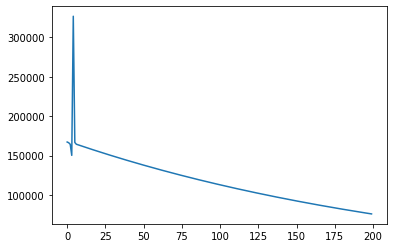

In [261]:
r_2 = r2_score(y_test,y_p)
print(r_2)
import matplotlib.pyplot as plt
print(x_test)
print(y_p)
print(y_test)
plt.plot(losses)